<a href="https://colab.research.google.com/github/raviakasapu/DeepLearningPyTorch/blob/main/02_PyTorch_Classification_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Neural Network Classfication

https://www.youtube.com/watch?v=Z_ikDlimN6A

In [63]:
import sklearn
from sklearn.datasets import make_circles

In [64]:
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [65]:
len(X), X.shape,len(y), y.shape

(1000, (1000, 2), 1000, (1000,))

In [66]:
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [67]:
import pandas as pd
import numpy as np

In [68]:
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "lable": y
                        }
                       )
circles.head(10)

,X1,X2,lable
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

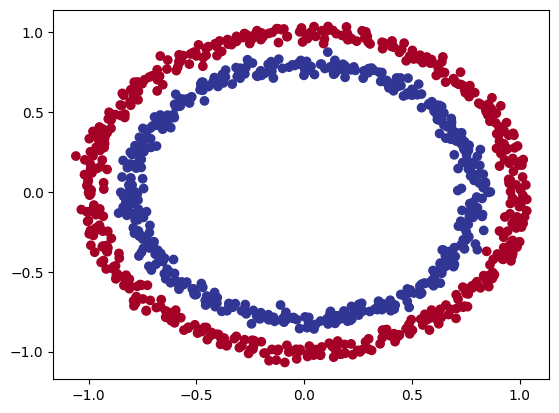

In [70]:
plt.scatter(x=circles["X1"],
            y=circles["X2"],
            c=y,
            cmap=plt.cm.RdYlBu)

In [71]:
X.shape, y.shape

((1000, 2), (1000,))

In [72]:
import torch
from torch import nn

In [73]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)
X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [76]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [77]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self,x):
    return self.layer_2(self.layer_1(x))

model_0 = CircleModel().to(device)

In [78]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [79]:
 model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
 ).to(device)

In [80]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [81]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [82]:
with torch.inference_mode():
  initial_preds = model_0(X_test.to(device))
initial_preds.shape

torch.Size([200, 1])

Text(0.5, 1.0, 'prediction results with untrained data')

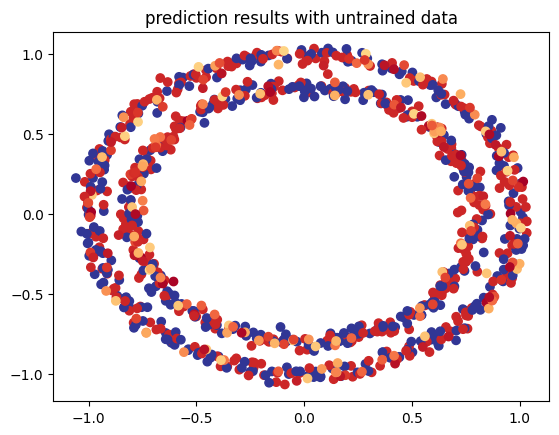

In [83]:
plt.scatter(x=circles["X1"],
            y=circles["X2"],
            c=np.append(y_train,initial_preds.to("cpu").numpy()),
            cmap=plt.cm.RdYlBu)
plt.title("prediction results with untrained data")

In [84]:
#loss_fn = nn.BCELoss()
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.1)

In [85]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [86]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))
y_logits.shape,y_logits[0:5,]

(torch.Size([200, 1]),
 tensor([[-0.0338],
         [-0.0309],
         [ 0.0894],
         [-0.0692],
         [ 0.2967]], device='cuda:0'))

In [87]:
y_prediction_probabilities = torch.sigmoid(y_logits)
y_prediction_probabilities[0:5,]

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [88]:
y_predicted_lables = torch.round(y_prediction_probabilities)
y_predicted_lables[0:5,]

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [89]:
X_train[:10,0]

tensor([ 0.6579,  0.6319, -1.0086, -0.9666, -0.1666, -0.8837, -0.3836,  0.6047,
        -0.5869,  0.8833])

In [90]:
y_logits[:10,]

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')

In [91]:
epochs = 1000
torch.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)
  accuracy = accuracy_fn(y_true=y_train,
                         y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_accuracy = accuracy_fn(y_true=y_test,
                                 y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss:{loss:.5f} | Accuracy {accuracy:.2f}% | test_loss:{test_loss:.5f} | test_accuracy:{test_accuracy:.2f}%")

Epoch: 0 | Loss:0.69796 | Accuracy 51.88% | test_loss:0.69440 | test_accuracy:58.00%
Epoch: 100 | Loss:0.69331 | Accuracy 49.25% | test_loss:0.69271 | test_accuracy:53.00%
Epoch: 200 | Loss:0.69310 | Accuracy 50.88% | test_loss:0.69336 | test_accuracy:49.00%
Epoch: 300 | Loss:0.69304 | Accuracy 51.12% | test_loss:0.69376 | test_accuracy:46.50%
Epoch: 400 | Loss:0.69301 | Accuracy 51.25% | test_loss:0.69403 | test_accuracy:47.50%
Epoch: 500 | Loss:0.69299 | Accuracy 50.88% | test_loss:0.69423 | test_accuracy:47.00%
Epoch: 600 | Loss:0.69299 | Accuracy 51.25% | test_loss:0.69436 | test_accuracy:46.50%
Epoch: 700 | Loss:0.69298 | Accuracy 51.25% | test_loss:0.69446 | test_accuracy:46.00%
Epoch: 800 | Loss:0.69298 | Accuracy 51.50% | test_loss:0.69453 | test_accuracy:45.50%
Epoch: 900 | Loss:0.69298 | Accuracy 51.38% | test_loss:0.69458 | test_accuracy:45.00%


In [92]:
import requests
from pathlib import Path

import os
import zipfile

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

helper_functions.py already exists


In [93]:
#!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py

In [94]:
from helper_functions import plot_predictions, plot_decision_boundary

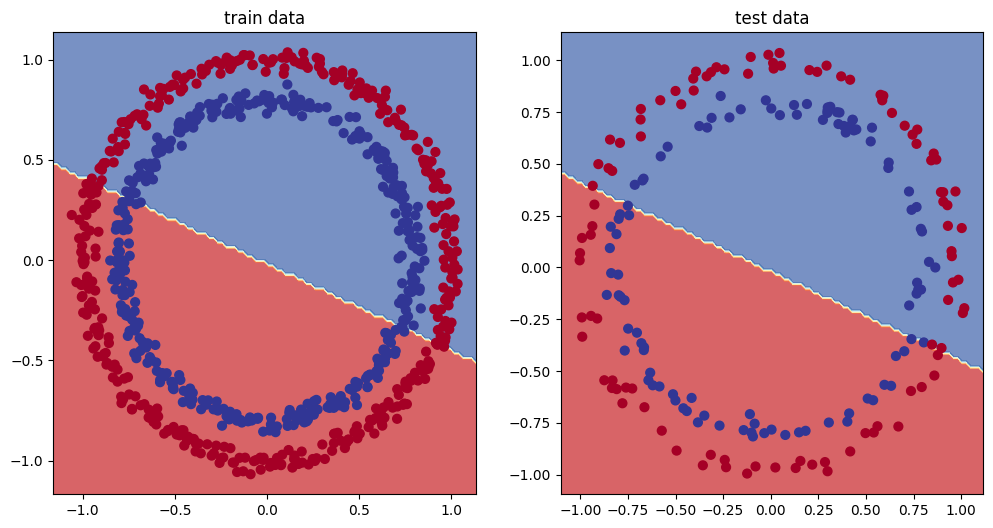

In [95]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train data")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test data")
plot_decision_boundary(model_0,X_test,y_test)

In [96]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0796, -0.2678],
                      [ 0.4837, -0.4847],
                      [-0.3285, -0.1960],
                      [-0.4351,  0.0318],
                      [-0.6787,  0.6935]])),
             ('0.bias', tensor([-0.6069,  0.5210,  0.1150, -0.2191,  0.4239])),
             ('1.weight',
              tensor([[ 0.0331,  0.2036, -0.0446, -0.1426,  0.2221]])),
             ('1.bias', tensor([-0.2053]))])

In [97]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self,x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z



In [98]:
  model_1 = CircleModelV1().to(device)
  model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [99]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [100]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_accuracy = accuracy_fn(y_true=y_test,
                                 y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss:{loss:.5f} | Accuracy {accuracy:.2f}% | test_loss:{test_loss:.5f} | test_accuracy:{test_accuracy:.2f}%")


Epoch: 0 | Loss:0.69396 | Accuracy 51.38% | test_loss:0.69261 | test_accuracy:51.00%
Epoch: 10 | Loss:0.69369 | Accuracy 51.38% | test_loss:0.69270 | test_accuracy:50.00%
Epoch: 20 | Loss:0.69351 | Accuracy 51.38% | test_loss:0.69283 | test_accuracy:49.50%
Epoch: 30 | Loss:0.69339 | Accuracy 51.38% | test_loss:0.69297 | test_accuracy:48.00%
Epoch: 40 | Loss:0.69329 | Accuracy 51.38% | test_loss:0.69310 | test_accuracy:49.00%
Epoch: 50 | Loss:0.69322 | Accuracy 51.38% | test_loss:0.69324 | test_accuracy:50.00%
Epoch: 60 | Loss:0.69317 | Accuracy 51.38% | test_loss:0.69336 | test_accuracy:51.50%
Epoch: 70 | Loss:0.69312 | Accuracy 51.38% | test_loss:0.69348 | test_accuracy:50.50%
Epoch: 80 | Loss:0.69309 | Accuracy 51.38% | test_loss:0.69359 | test_accuracy:50.00%
Epoch: 90 | Loss:0.69307 | Accuracy 51.38% | test_loss:0.69370 | test_accuracy:48.50%


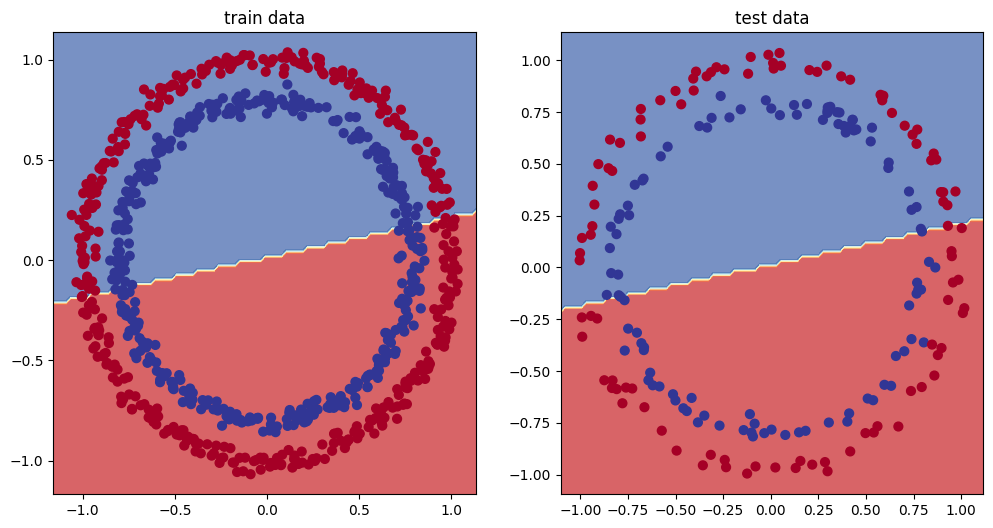

In [101]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train data")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test data")
plot_decision_boundary(model_1,X_test,y_test)

# run Model _1 on linear data

In [102]:
bias = 0.7
weight_1 = 0.3
weight_2 = 0.6
weight_3 = 0.9

start = 0
end = 1
step = 0.02

x1 = torch.arange(start, end , step).unsqueeze(dim=1)
x2 = torch.arange(start, end/2 , step/2).unsqueeze(dim=1)
x3 = torch.arange(start, end/0.75 , step/0.75).unsqueeze(dim=1)

y = weight_1 * x1 + weight_2 * x2 + weight_3 * x3 + bias

X = torch.cat((x1,x2,x3), dim=1)
X.shape, y.shape

(torch.Size([50, 3]), torch.Size([50, 1]))

In [103]:
train_split = int(0.8*len(X))
train_split

40

In [104]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [105]:

def plot_multi_visualizations(train_data=X_train,
                        train_labels=y_train,
                        test_data=X_test,
                        test_labels=y_test,
                        predictions=None
                        ):
  plt.figure(figsize=(10,7))
  colors = ["b","g","black"]
  print(train_data.shape[1]-1)

  #for dim in train_data.shape[1]:
  #  plt.scatter(train_data[:,dim-1], train_labels, c='r',s=8, label="training data")
  #  plt.scatter(test_data[:,dim-1], test_labels, c="g",s=4, label="testing data")
  plt.scatter(train_data[:,0], train_labels, c='b', marker="o", label="training data_1")
  plt.scatter(train_data[:,1], train_labels, c='b', marker="o", label="training data_2")
  plt.scatter(train_data[:,2], train_labels, c='b', marker="o", label="training data_3")

  plt.scatter(test_data[:,0], test_labels, c="g", marker="D", label="testing data_1")
  plt.scatter(test_data[:,1], test_labels, c="g", marker="D", label="testing data_2")
  plt.scatter(test_data[:,2], test_labels, c="g", marker="D", label="testing data_3")

  if predictions is not None:
    plt.scatter(test_data[:,0], predictions, c="r",marker="*", label="Predictions data")
    plt.scatter(test_data[:,1], predictions, c="r",marker="*", label="Predictions data")
    plt.scatter(test_data[:,2], predictions, c="r",marker="*", label="Predictions data")

  plt.legend(prop={"size":14})


2


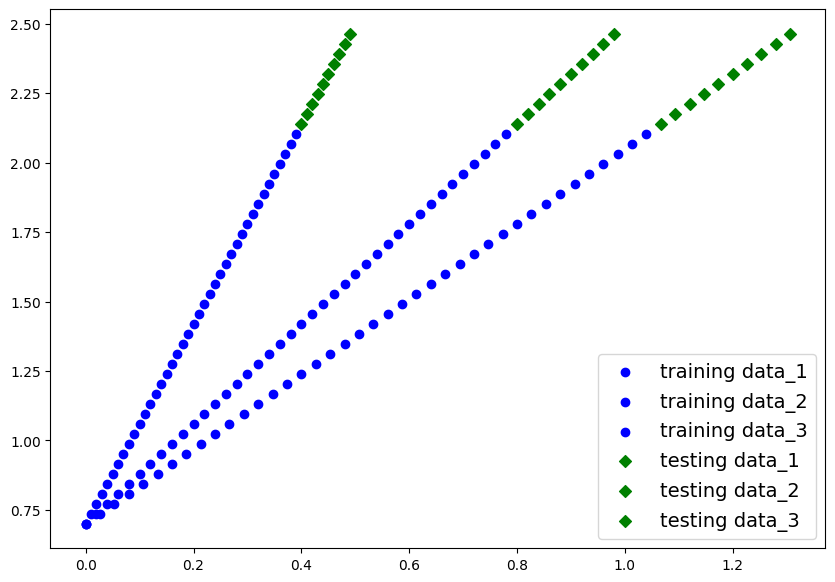

In [106]:
plot_multi_visualizations(X_train.to("cpu").numpy(),y_train.to("cpu").numpy(), X_test.to("cpu").numpy(),y_test.to("cpu").numpy())

In [107]:
class CircleModelV1_liner(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=3, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self,x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z



In [108]:
  model_1_linear = CircleModelV1_liner().to(device)
  model_1_linear

CircleModelV1_liner(
  (layer_1): Linear(in_features=3, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [109]:
loss_fn = torch.nn.functional.mse_loss
optimizer = torch.optim.SGD(params=model_1_linear.parameters(), lr=0.01)

In [110]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1_linear.train()

  #y_logits = model_1_linear(X_train).squeeze()
  #y_pred = torch.round(torch.sigmoid(y_logits))
  y_pred = model_1_linear(X_train)

  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  model_1_linear.eval()
  with torch.inference_mode():
    #test_logits = model_1_linear(X_test).squeeze()
    #test_pred = torch.round(torch.sigmoid(test_logits))

    test_pred = model_1_linear(X_test)

    test_loss = loss_fn(test_pred,
                        y_test)


  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss:{loss:.5f} |  test_loss:{test_loss:.5f} ")


Epoch: 0 | Loss:1.18552 |  test_loss:3.23521 
Epoch: 100 | Loss:0.04508 |  test_loss:0.18248 
Epoch: 200 | Loss:0.01960 |  test_loss:0.07706 
Epoch: 300 | Loss:0.00705 |  test_loss:0.02716 
Epoch: 400 | Loss:0.00217 |  test_loss:0.00824 
Epoch: 500 | Loss:0.00060 |  test_loss:0.00226 
Epoch: 600 | Loss:0.00015 |  test_loss:0.00058 
Epoch: 700 | Loss:0.00004 |  test_loss:0.00015 
Epoch: 800 | Loss:0.00001 |  test_loss:0.00004 
Epoch: 900 | Loss:0.00000 |  test_loss:0.00001 


In [111]:
with torch.inference_mode():
  y_pred_new_multi = model_1_linear(X_test)

2


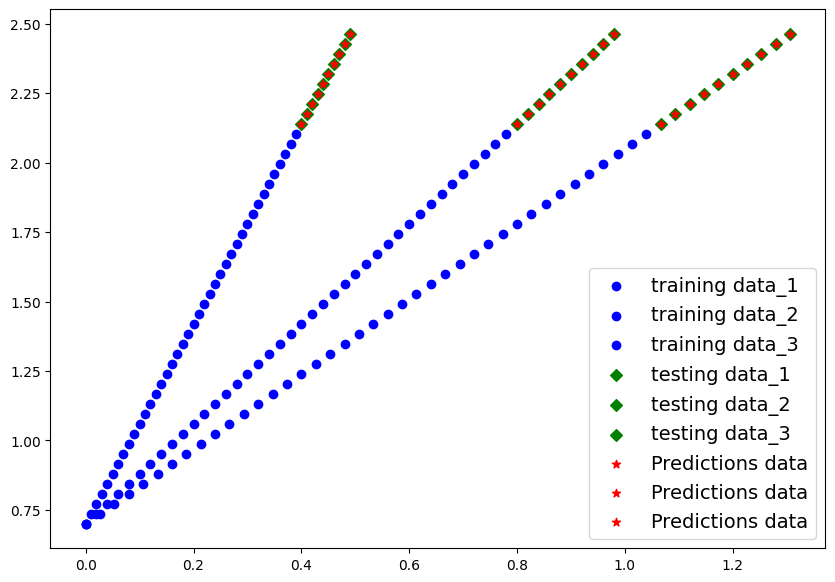

In [112]:
plot_multi_visualizations(X_train.cpu(),y_train.cpu(), X_test.cpu(),y_test.cpu(),predictions=y_pred_new_multi.cpu())

# using non linear data

In [113]:
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [114]:
len(X), X.shape,len(y), y.shape

(1000, (1000, 2), 1000, (1000,))

In [115]:
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "lable": y
                        }
                       )
circles.head(10)

,X1,X2,lable
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


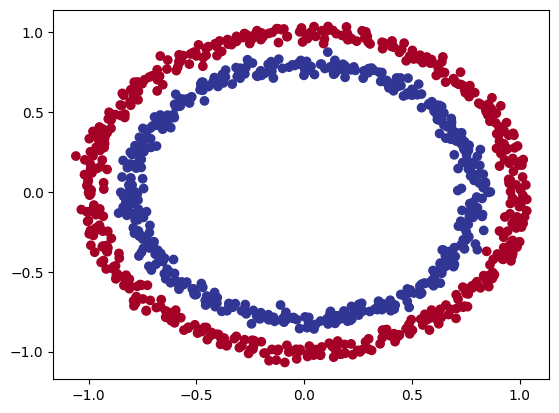

In [116]:
plt.scatter(x=circles["X1"],
            y=circles["X2"],
            c=y,
            cmap=plt.cm.RdYlBu)

In [117]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)
X.shape, y.shape


(torch.Size([1000, 2]), torch.Size([1000]))

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
                                                    )


In [119]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [120]:
class CircleModel_nonlinear(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1= nn.Linear(in_features=2,out_features=10)
    self.layer_2= nn.Linear(in_features=10,out_features=10)
    self.layer_3= nn.Linear(in_features=10,out_features=1)
    self.relu = nn.ReLU()

  def forward(self,x):
    z=self.layer_1(x)
    z=self.relu(z)
    z=self.layer_2(z)
    z=self.relu(z)
    z=self.layer_3(z)
    return z


In [121]:
model_2_nonliner = CircleModel_nonlinear().to(device)
model_2_nonliner

CircleModel_nonlinear(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [122]:
loss_fn = torch.nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_2_nonliner.parameters(),
                            lr=0.1)

In [123]:
epochs = 1000
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_2_nonliner.train()

  y_logits = model_2_nonliner(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  accuracy = accuracy_fn(y_true=y_train,
                         y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

  model_2_nonliner.eval()
  with torch.inference_mode():
    test_logits = model_2_nonliner(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)

    test_accuracy = accuracy_fn(y_true=y_test,
                                 y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss:{loss:.5f} | Accuracy {accuracy:.2f}% | test_loss:{test_loss:.5f} | test_accuracy:{test_accuracy:.2f}%")


Epoch: 0 | Loss:0.69295 | Accuracy 50.00% | test_loss:0.69319 | test_accuracy:50.00%
Epoch: 100 | Loss:0.69115 | Accuracy 52.88% | test_loss:0.69102 | test_accuracy:52.50%
Epoch: 200 | Loss:0.68977 | Accuracy 53.37% | test_loss:0.68940 | test_accuracy:55.00%
Epoch: 300 | Loss:0.68795 | Accuracy 53.00% | test_loss:0.68723 | test_accuracy:56.00%
Epoch: 400 | Loss:0.68517 | Accuracy 52.75% | test_loss:0.68411 | test_accuracy:56.50%
Epoch: 500 | Loss:0.68102 | Accuracy 52.75% | test_loss:0.67941 | test_accuracy:56.50%
Epoch: 600 | Loss:0.67515 | Accuracy 54.50% | test_loss:0.67285 | test_accuracy:56.00%
Epoch: 700 | Loss:0.66659 | Accuracy 58.38% | test_loss:0.66322 | test_accuracy:59.00%
Epoch: 800 | Loss:0.65160 | Accuracy 64.00% | test_loss:0.64757 | test_accuracy:67.50%
Epoch: 900 | Loss:0.62362 | Accuracy 74.00% | test_loss:0.62145 | test_accuracy:79.00%


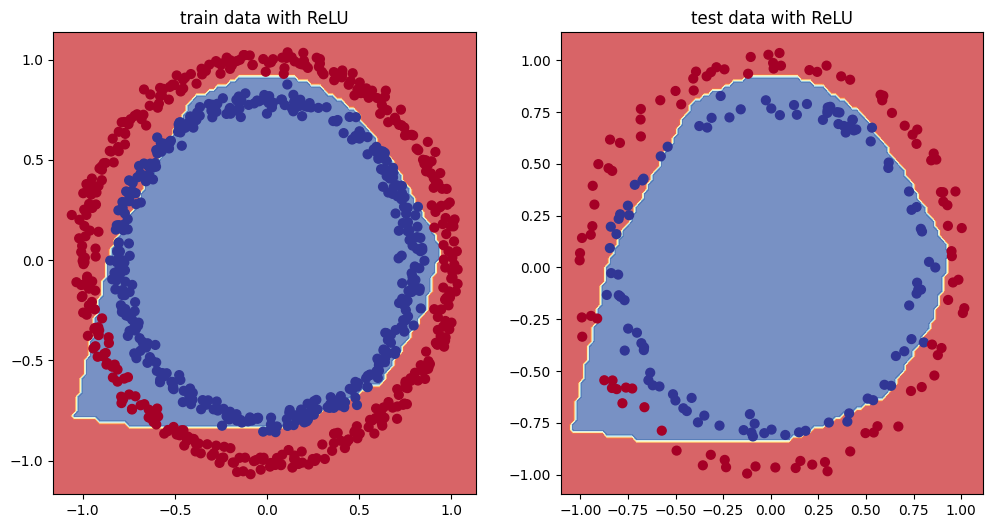

In [124]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train data with ReLU")
plot_decision_boundary(model_2_nonliner,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test data with ReLU")
plot_decision_boundary(model_2_nonliner,X_test,y_test)

# replicating non linear activation functions

In [126]:
A = torch.arange(-10,10,1, dtype=torch.float32)
A.dtype

torch.float32

In [127]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

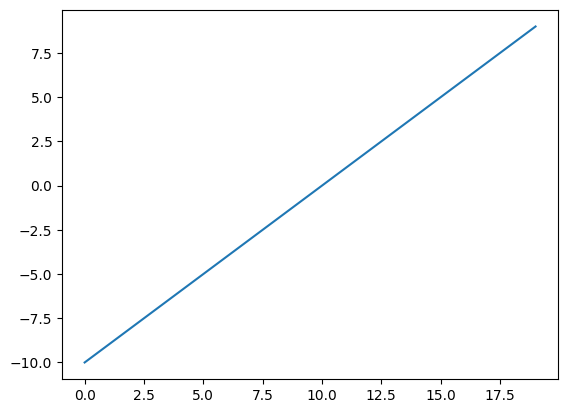

In [128]:
plt.plot(A)

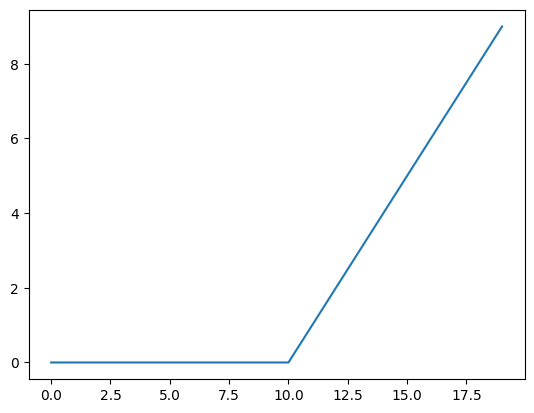

In [129]:
plt.plot(torch.relu(A))

In [130]:
def relu_u(x: torch.tensor) -> torch.tensor:
  return torch.maximum(torch.tensor(0),x)

In [131]:
relu_u(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

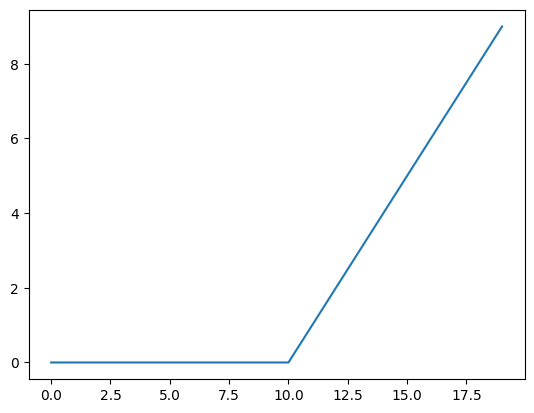

In [135]:
plt.plot(relu_u(A))

In [132]:
def sigmoid_u(x: torch.tensor) -> torch.tensor:
  return 1/(1+torch.exp(-x))

In [133]:
sigmoid_u(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

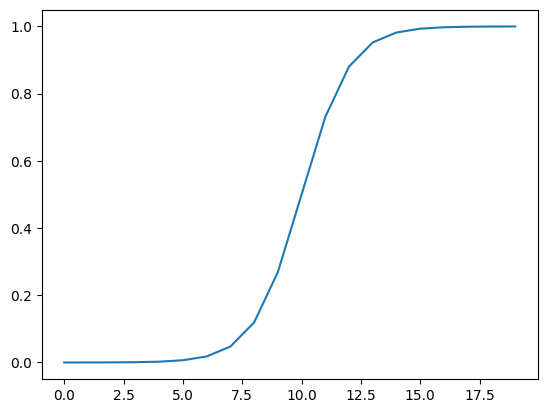

In [134]:
plt.plot(sigmoid_u(A))